In [125]:
# importing all the libraries we need
import requests
import re
from bs4 import BeautifulSoup
import time
import glob
import os
import builtins

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import plotly.express as px

In [ ]:
# First, mount the Google Drive linked to your Colab session:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Scraping the data

In [ ]:
names = []
vacancies = {}
URL = 'https://hh.kz/vacancies/'
headers = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'}
URLs = ['programmist'] # 'bukhgalter', 'inzhener', 'menedzher_po_prodazham', 'direktor', 'administrator', 'marketolog', 'dizayner', 'yurist', 'sekretar'
vacancy_id = 1

for URL1 in URLs:
  page_number = 0
  while True:
        off_url = f'{URL}{URL1}?page={page_number}'
        page = requests.get(off_url, headers=headers)
        soup = BeautifulSoup(page.text, 'html.parser')


        vacancy_blocks = soup.find_all('div', attrs={'class': 'vacancy-info--umZA61PpMY07JVJtomBA'})

        if not vacancy_blocks:
            break

        for block in vacancy_blocks:
            try:
                # Getting data that we need such as name, salary experience, company and location
                name = block.find('h2', attrs={'class': 'bloko-header-section-2'}).find('span').text.strip()
                salary_element = block.find('span', attrs={'class': 'magritte-text___pbpft_3-0-16 magritte-text_style-primary___AQ7MW_3-0-16 magritte-text_typography-label-1-regular___pi3R-_3-0-16'})
                salary = salary_element.text if salary_element else None
                experience = block.find('div', attrs={'class': 'magritte-tag__label___YHV-o_3-0-19'}).find('span').text
                company_name = block.find('div', attrs={'class': 'company-name-badges-container--kC8yYUJPFyg6J6XQs62Y'}).text
                location = block.find('span', attrs={'data-qa': 'vacancy-serp__vacancy-address'}).text
                # Save the data to dictionary
                vacancies[vacancy_id] = {
                    'Vacancy_name': name,
                    'Salary': salary,
                    'Experience': experience,
                    'Company_name': company_name,
                    'Location': location
                }
                print(name, salary, experience, location, f"Count pages {vacancy_id}")
                vacancy_id += 1
            except AttributeError:
                print(AttributeError)
                continue
        time.sleep(10)
        page_number += 1
  # After that, we save data using a DataFrame
  df = pd.DataFrame.from_dict(vacancies, orient='index')
  df.to_csv(f'{URL1}.csv', index_label='ID', encoding='utf-8')
names

Программист микроконтроллера 250 000 – 600 000 ₸ до вычета налогов Без опыта Шымкент Count pages 1
Middle Программист 1С None Опыт 3-6 лет Костанай Count pages 2
Программист-разработчик None Опыт 1-3 года Астана Count pages 3
Программист None Опыт 1-3 года Алматы Count pages 4
Разработчик программного обеспечения None Опыт 1-3 года Алматы Count pages 5
Программист-разработчик ТОО АкТех от 450 000 ₸ на руки Опыт 1-3 года Алматы Count pages 6
Программист AI None Опыт 1-3 года Алматы Count pages 7
Программист IT 180 000 – 250 000 ₸ на руки Опыт 1-3 года Шымкент Count pages 8
Backend-разработчик от 500 000 ₸ на руки Опыт 3-6 лет Алматы Count pages 9
Инженер-программист C/C++ 700 000 – 1 100 000 ₸ на руки Опыт 3-6 лет Алматы Count pages 10
Программист 290 304 – 290 304 ₸ до вычета налогов Опыт 1-3 года Алматы Count pages 11
Программист-стажер 1C 115 000 – 250 000 ₸ до вычета налогов Без опыта Астана Count pages 12
Backend-разработчик 400 000 – 800 000 ₸ на руки Опыт 3-6 лет Алматы Count pag

KeyboardInterrupt: 

# General analysis

## Population

### Answer for the main question

In [126]:
folder_path = '/content/sample_data/Data/'

csv_files = glob.glob(folder_path + "*.csv")

# for file_path in csv_files:
for i in range(1, 11):
    file_path = os.path.join(folder_path, f'file{i}.csv')
    bf = pd.read_csv(file_path)
    bf.dropna(inplace=True)
    bf.replace({
    'Новоишимское': 'СКО',
    'Усть-Каменогорск': 'ВКО',
    'Кокшетау': 'Акмолинская область',
    'Актобе': 'Актюбинская область',
    'Павлодар':'Павлодарская область',
    'Костанай': 'Костанайская область',
    'Атырау':'Атырауская область',
    'Семей':'Абайская область',
    'Темиртау': 'Карагандинская область',
    'Талдыкорган': 'Жетысуская область',
    'Караганда': 'Карагандинская область',
    'Туркестан': 'Туркестанская область',
    'Петропавловск': 'СКО',
    'Уральск': 'ЗКО',
    'Талгар': 'Алматинская область',
    'Кызылорда': 'Кызылординская область',
    'Актау':'Мангистауская область',
    'Карабалык': 'Костанайская область',
    'Тараз': 'Жамбылская область',
    'Щучинск': 'Акмолинская область',
    'Конаев': 'Алматинская область',
    'Экибастуз':'Павлодарская область',
    'Лисаковск': 'Костанайская область',
    'Житикара': 'Костанайская область',
    'Шу': 'Жамбылская область',
    'Алтай (Зыряновск)': 'ВКО',
    'Атбасар': 'Акмолинская область',
    'Жезказган': 'Улытауская область',
    'Хромтау': 'Актюбинская область',
    'Каскелен': 'Алматинская область',
    'Отеген-Батыр': 'Алматинская область',
    'Арысь (Туркестанская область)': 'Туркестанская область',
    'Рудный': 'Костанайская область',
    'Балхаш': 'Карагандинская область',
    'Риддер (ВКО)': 'ВКО',
    'Шахтинск': 'Карагандинская область',
    'Аксу (Павлодар.обл)':'Павлодарская область',
    'Сарыагаш': 'Туркестанская область',
    'Жаркент': 'Жетысуская область',
    'Сарань': 'Карагандинская область',
    'Абай': 'Алматинская область',
    'Ушарал': 'Жетысуская область',
    'Макинск': 'Акмолинская область',
    'Степногорск': 'Акмолинская область',
    'Есик': 'Алматинская область',
    'Аксай (Казахстан)':'ЗКО',
    'Аркалык': 'Костанайская область',
    'Качар': 'Костанайская область',
    'Жанаозен':'Мангистауская область',
    'Зеренда': 'Акмолинская область',
    'Аральск': 'Кызылординская область',
    'Сарыкемер': 'Жамбылская область',
    'Косшы': 'Акмолинская область',
    'Жансугуров': 'Жетысуская область',
    'Шемонаиха (ВКО)':'ВКО',
    'Тайынша': 'СКО',
    'Мангистау':'Мангистауская область',
    'Кульсары':'Атырауская область',
    'Алга (Актюбинская обл)': 'Актюбинская область',
    'Атакент': 'Туркестанская область',
    'Кентау (ЮКО)': 'Туркестанская область',
    'Сатпаев': 'Улытауская область',
    'Жетыбай (Мангистауская область)':'Мангистауская область',
    'Курык':'Мангистауская область',
    'Сарыозек': 'Жетысуская область',
    'Аксукент': 'Туркестанская область',
    'Каргалы': 'Жамбылская область',
    'Торетам': 'Кызылординская область',
    'Калбатау': 'Абайская область'
     }, inplace=True)
    grouped = bf.groupby(['Location'])
    de = grouped['Vacancy_name'].count().reset_index()
    bar_chart = px.bar(de, x='Vacancy_name', y='Location', title=f'{file_path} Vacancies counts in several regions chart')
    bar_chart.update_layout(
        xaxis_title="Count",
        yaxis_title="Regions"
    )
    bar_chart.show()

In [127]:
df = pd.read_csv(folder_path + "unified.csv")

In [128]:
population = pd.read_csv(folder_path + 'population.csv')

In [129]:
population.dropna(inplace=True)

In [130]:
population['Population by region'].unique()

array(['Abay', 'Akmola', 'Aktobe', 'Almaty', 'Atyrau', 'Batys Kazakhstan',
       'Zhambyl', 'Zhetisu', 'Karagandy', 'Kostanay', 'Kyzylorda',
       'Mangystau', 'Pavlodar', 'Soltustik Kazakhstan', 'Turkistan',
       'Ulytau', 'Shygys Kazakhstan', 'Astana city', 'Almaty city',
       'Shymkent city'], dtype=object)

In [131]:
population.replace({'Abay': 'Абайская область', 'Akmola': 'Акмолинская область', 'Aktobe': 'Актюбинская область', 'Almaty': 'Алматинская область', 'Atyrau': 'Атырауская область', 'Batys Kazakhstan' : 'ВКО',
       'Zhambyl':'Жамбылская область', 'Zhetisu':'Жетысуская область', 'Karagandy':'Карагандинская область', 'Kostanay':'Костанайская область', 'Kyzylorda':'Кызылординская область',
       'Mangystau':'Мангистауская область', 'Pavlodar':'Павлодарская область', 'Soltustik Kazakhstan':'СКО', 'Turkistan':'Туркестанская область',
       'Ulytau':'Улытауская область', 'Shygys Kazakhstan':'ЗКО', 'Astana city':'Астана', 'Almaty city':'Алматы',
       'Shymkent city':'Шымкент'}, inplace=True)

In [132]:
population.describe()

,all,density
count,20,20
mean,988,298
std,494,795
min,221,1
25%,697,4
50%,810,6
75%,1199,10
max,2162,3148


In [133]:
population.drop(columns=['Unnamed: 1', 'Unnamed: 2'], inplace=True)

In [ ]:
population_renamed = population.rename(columns={'Population by region': 'Location'}, inplace=True)

In [ ]:
df_location = df.groupby(['Location'])

In [ ]:
sum = df_location['Vacancy_name'].count()

In [124]:
result = pd.merge(population, sum, on='Location', how='left')
result.rename(columns={'Vacancy_name': 'Vacancy_count'}, inplace=True)
result.rename(columns={'all': 'Population'}, inplace=True)
result

,Location,Population,density,Vacancy_count
0,Абайская область,610,3,NaN
1,Акмолинская область,788,5,NaN
2,Актюбинская область,928,3,NaN
3,Алматинская область,1506,14,NaN
4,Атырауская область,693,6,NaN
5,ВКО,688,5,NaN
6,Жамбылская область,1218,8,NaN
7,Жетысуская область,699,6,NaN
8,Карагандинская область,1135,5,NaN
9,Костанайская область,832,4,NaN


In [ ]:
corr_df = result['Vacancy_count'].corr(result['density'])
corr_df

0.9766717168229572

In [ ]:
bar_chart = px.scatter(result, x='Vacancy_count', y='Population', color='Location', title='Population Vacancy chart')
bar_chart.show()

### Proportion of vacancy types or roles by experience level.

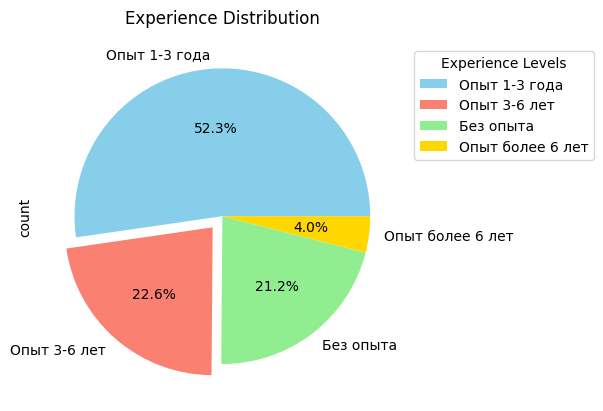

In [ ]:
explode = (0, 0.1, 0, 0)
# Plotting the pie chart
df.Experience.value_counts().plot.pie(autopct='%0.1f%%', colors=['skyblue', 'salmon', 'lightgreen', 'gold'], explode=explode)

plt.title('Experience Distribution')

plt.legend(title="Experience Levels", loc="center left", bbox_to_anchor=(1, 0.8))
plt.show()

### Ten most frequent job titles

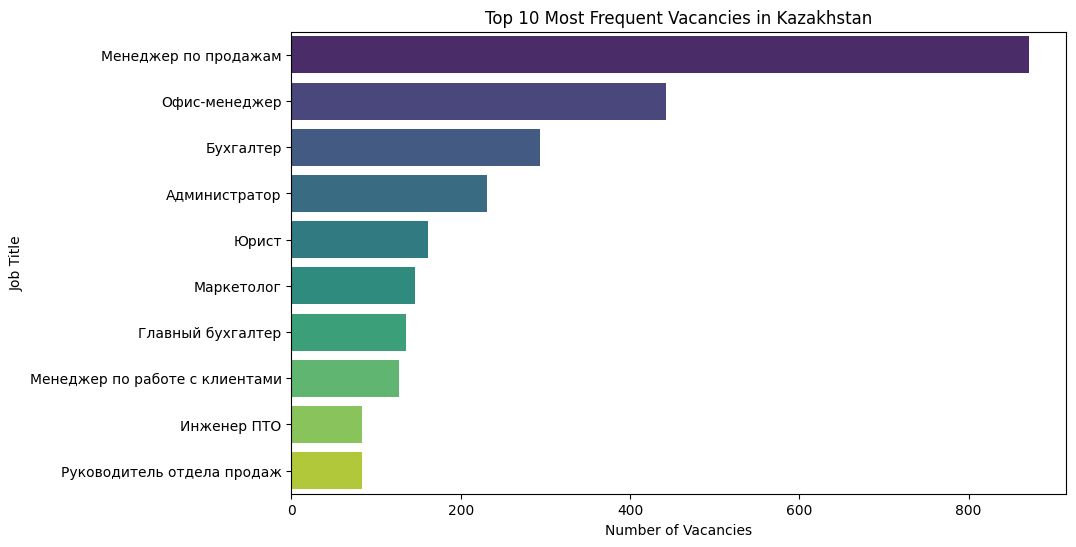

In [ ]:
# Collecting job titles by its count
top_job_titles = df['Vacancy_name'].value_counts().head(10)

# Plotting the bar
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, hue=top_job_titles.index, palette='viridis')

# Adding lables and title
plt.title('Top 10 Most Frequent Vacancies in Kazakhstan')
plt.xlabel('Number of Vacancies')
plt.ylabel('Job Title')
plt.show()

# Data preprocessing and cleaning

In [ ]:
dataframes = []
for i in range(1, 11):  # Adjust range based on your file names
    filepath = os.path.join('/content/sample_data/Data',f'file{i}.csv')
    df = pd.read_csv(filepath)
    dataframes.append(df)

In [ ]:
for i, df in enumerate(dataframes):
    print(f'DataFrame {i+1}:')
    print(df.head())

DataFrame 1:
   ID                               Vacancy_name  \
0   1                   Администратор-кассир СПА   
1   2                      Администратор клиники   
2   3  Администратор в стоматологическую клинику   
3   4          Администратор в медицинский центр   
4   5          Администратор в кофейню (общепит)   

                           Salary     Experience  \
0  от 250 000 ₸ до вычета налогов  Опыт 1-3 года   
1     250 000 – 250 000 ₸ на руки  Опыт 1-3 года   
2     200 000 – 250 000 ₸ на руки      Без опыта   
3            от 250 000 ₸ на руки  Опыт 1-3 года   
4            от 270 000 ₸ на руки  Опыт 1-3 года   

                                 Company_name Location  
0     ИП Fitness Palace KZ Нурмаханбетов Е.С.   Астана  
1          ТОО Офтальмологический Центр Focus   Алматы  
2  ТОО Центральная стоматология города Астаны   Астана  
3                               ТОО RB-clinic   Астана  
4                    ТОО Coffee Group Company   Алматы  
DataFrame 2:
   ID 

In [ ]:
# Assuming `dataframes` is a list of your DataFrames
united_df = pd.concat(dataframes, ignore_index=True)
df = united_df
df

,ID,Vacancy_name,Salary,Experience,Company_name,Location
0,1,Администратор-кассир СПА,от 250 000 ₸ до вычета налогов,Опыт 1-3 года,ИП Fitness Palace KZ Нурмаханбетов Е.С.,Астана
1,2,Администратор клиники,250 000 – 250 000 ₸ на руки,Опыт 1-3 года,ТОО Офтальмологический Центр Focus,Алматы
2,3,Администратор в стоматологическую клинику,200 000 – 250 000 ₸ на руки,Без опыта,ТОО Центральная стоматология города Астаны,Астана
3,4,Администратор в медицинский центр,от 250 000 ₸ на руки,Опыт 1-3 года,ТОО RB-clinic,Астана
4,5,Администратор в кофейню (общепит),от 270 000 ₸ на руки,Опыт 1-3 года,ТОО Coffee Group Company,Алматы
...,...,...,...,...,...,...
15080,598,Менеджер по тендерам,100 000 – 1 000 000 ₸ на руки,Без опыта,ТОО Caplan and Gold,Алматы
15081,599,"Юрист начального уровня, помощник Частного суд...",80 000 – 100 000 ₸ на руки,Без опыта,ЧСИ,Алматы
15082,600,Менеджер по персоналу,150 000 – 200 000 ₸ до вычета налогов,Опыт 1-3 года,ТОО Центр недвижимости Витрина Aktau,Актау
15083,601,Главный бухгалтер,от 500 000 ₸ до вычета налогов,Опыт более 6 лет,ТОО ЮрБух Ко,Актобе


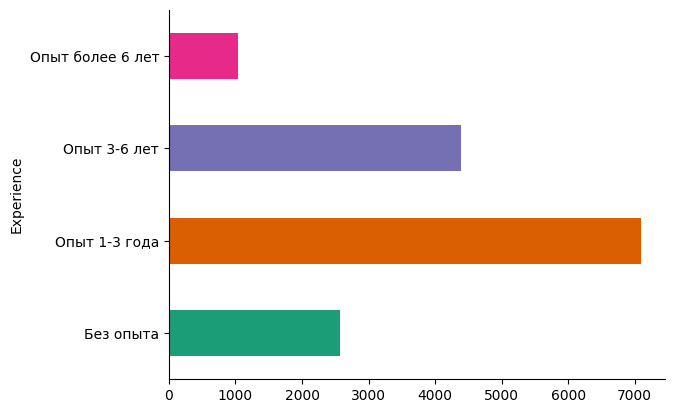

In [ ]:
# @title Experience
df.groupby('Experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Sample salary column (replace 'salary' with your actual column name)
df['salary_cleaned'] = df['Salary'].astype(str).apply(lambda x: re.findall(r'\d+', x.replace(' ', '')))

# Convert extracted salary ranges to numeric and calculate the average
def calculate_average_salary(salary_list):
    # Convert the list of strings to integers
    salary_numbers = list(map(int, salary_list))

    # If there are two numbers, take the average; if only one, use it as-is
    if len(salary_numbers) == 2:
        return builtins.sum(salary_numbers) / 2
    elif len(salary_numbers) == 1:
        return salary_numbers[0]
    else:
        return None  # For any unexpected formats

# Apply the function to calculate average salaries
df['Salary'] = df['salary_cleaned'].apply(calculate_average_salary)

In [ ]:
# Drop rows with any NaN values
df.dropna(inplace=True)
df.drop(columns=['salary_cleaned'], inplace=True)

In [ ]:
df = df.sort_values(by='Salary', ascending=False)
# Drop rows with average_salary lower than 70000
df = df[df['Salary'] >= 70000]
df

,ID,Vacancy_name,Salary,Experience,Company_name,Location
4401,402,Руководитель направления продаж ПК (B2B|B2C),5500000,Опыт 3-6 лет,ТОО ARYSTAN IT GROUP,Алматы
10301,689,Ведущий менеджер по продажам B2G,5500000,Опыт 3-6 лет,ТОО ARYSTAN IT GROUP,Алматы
4353,354,Руководитель направления продаж LED (B2B|B2C),5500000,Опыт 3-6 лет,ТОО ARYSTAN IT GROUP,Алматы
10376,764,Ведущий менеджер по продажам LED B2B|B2C,5500000,Опыт 3-6 лет,ТОО ARYSTAN IT GROUP,Алматы
9807,195,Менеджер по продажам B2G,4125000,Опыт 1-3 года,ТОО ARYSTAN IT GROUP,Алматы
...,...,...,...,...,...,...
8261,1190,Инженер ПТО (монтаж технологического трубопров...,70000,Опыт 1-3 года,ООО Калькедон Строй,Павлодар
14002,390,Офис-менеджер,70000,Без опыта,ИП Саулимбаева,Шымкент
13185,1573,Техник-программист,70000,Опыт 1-3 года,КГУ ЦЕНТР РАЗВИТИЯ ИНФОРМАТИЗАЦИИ ПАВЛОДАРСКОЙ...,Павлодар
13972,360,Офис-менеджер,70000,Без опыта,ТОО Ассоциация автошкол Казахстана,Кызылорда


In [ ]:
df.to_csv(folder_path + 'unified.csv', index=False)

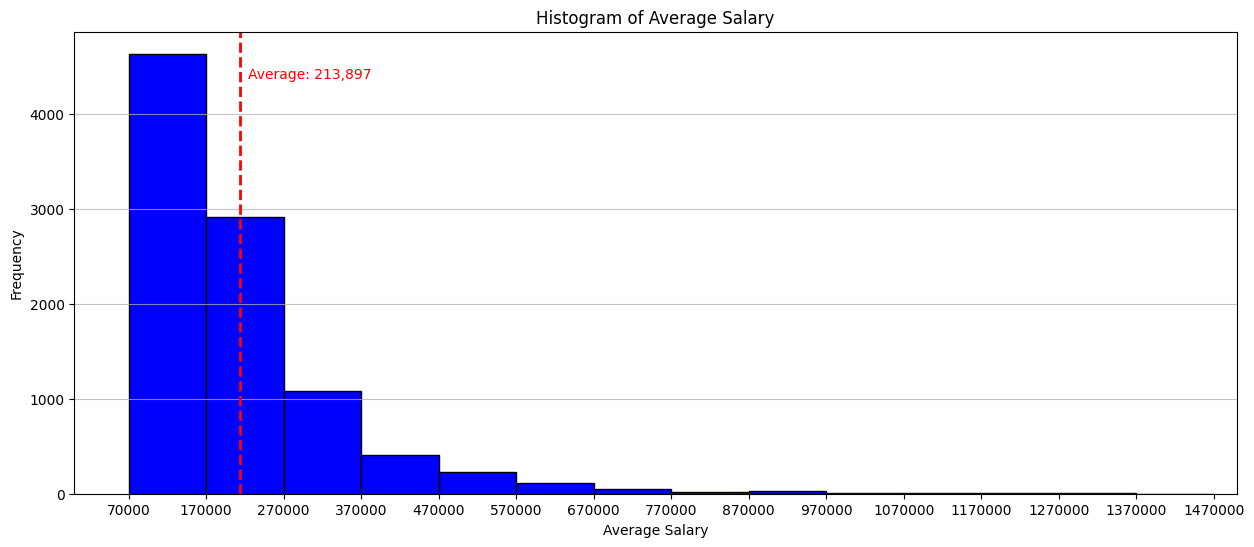

In [ ]:
# Ensure that floating-point numbers are displayed without scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Sample salary data (replace with your actual DataFrame 'df')
# df = pd.DataFrame({'Salary': [list of salary values]})

# Define bins with a 100k bin size
bins = list(range(70000, 1500001, 100000))

# Plot histogram
plt.figure(figsize=(15, 6))
plt.hist(df['Salary'], bins=bins, color='blue', edgecolor='black')
plt.title('Histogram of Average Salary')  # Descriptive title
plt.xlabel('Average Salary')  # Descriptive x-axis label
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Compute and plot the average salary
average_salary = df['Salary'].mean()
plt.axvline(average_salary, color='red', linestyle='dashed', linewidth=2)
plt.text(average_salary + 10000, plt.ylim()[1] * 0.9, f'Average: {average_salary:,.0f}', color='red')

# Set x-ticks to show the bin edges
plt.xticks(bins)

# Set x-axis and y-axis limits to improve readability
plt.xlim(0, 1500000)

# Disable scientific notation for both x and y axes
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().xaxis.get_major_formatter().set_useOffset(False)
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# Display the plot
plt.show()


In [ ]:
df['Location'].unique()

array(['Алматы', 'Астана', 'Новоишимское', 'Усть-Каменогорск', 'Кокшетау',
       'Павлодар', 'Костанай', 'Шымкент', 'Атырау', 'Темиртау', 'Семей',
       'Талдыкорган', 'Караганда', 'Актобе', 'Петропавловск', 'Уральск',
       'Кызылорда', 'Талгар', 'Актау', 'Карабалык', 'Тараз', 'Щучинск',
       'Конаев', 'Атбасар', 'Экибастуз', 'Лисаковск', 'Житикара', 'Шу',
       'Алтай (Зыряновск)', 'Жезказган', 'Хромтау', 'Каскелен',
       'Туркестан', 'Отеген-Батыр', 'Рудный', 'Балхаш', 'Риддер (ВКО)',
       'Арысь (Туркестанская область)', 'Шахтинск', 'Аксу (Павлодар.обл)',
       'Сарыагаш', 'Сарань', 'Жаркент', 'Абай', 'Ушарал', 'Макинск',
       'Степногорск', 'Есик', 'Аксай (Казахстан)', 'Аркалык', 'Качар',
       'Жанаозен', 'Зеренда', 'Аральск', 'Сарыкемер', 'Косшы',
       'Жансугуров', 'Шемонаиха (ВКО)', 'Тайынша', 'Мангистау',
       'Кульсары', 'Алга (Актюбинская обл)', 'Атакент', 'Кентау (ЮКО)',
       'Сатпаев', 'Жетыбай (Мангистауская область)', 'Курык', 'Сарыозек',
       'Акс

In [ ]:
df.replace({
    'Новоишимское': 'СКО',
    'Усть-Каменогорск': 'ВКО',
    'Кокшетау': 'Акмолинская область',
    'Актобе': 'Актюбинская область',
    'Павлодар':'Павлодарская область',
    'Костанай': 'Костанайская область',
    'Атырау':'Атырауская область',
    'Семей':'Абайская область',
    'Темиртау': 'Карагандинская область',
    'Талдыкорган': 'Жетысуская область',
    'Караганда': 'Карагандинская область',
    'Туркестан': 'Туркестанская область',
    'Петропавловск': 'СКО',
    'Уральск': 'ЗКО',
    'Талгар': 'Алматинская область',
    'Кызылорда': 'Кызылординская область',
    'Актау':'Мангистауская область',
    'Карабалык': 'Костанайская область',
    'Тараз': 'Жамбылская область',
    'Щучинск': 'Акмолинская область',
    'Конаев': 'Алматинская область',
    'Экибастуз':'Павлодарская область',
    'Лисаковск': 'Костанайская область',
    'Житикара': 'Костанайская область',
    'Шу': 'Жамбылская область',
    'Алтай (Зыряновск)': 'ВКО',
    'Атбасар': 'Акмолинская область',
    'Жезказган': 'Улытауская область',
    'Хромтау': 'Актюбинская область',
    'Каскелен': 'Алматинская область',
    'Отеген-Батыр': 'Алматинская область',
    'Арысь (Туркестанская область)': 'Туркестанская область',
    'Рудный': 'Костанайская область',
    'Балхаш': 'Карагандинская область',
    'Риддер (ВКО)': 'ВКО',
    'Шахтинск': 'Карагандинская область',
    'Аксу (Павлодар.обл)':'Павлодарская область',
    'Сарыагаш': 'Туркестанская область',
    'Жаркент': 'Жетысуская область',
    'Сарань': 'Карагандинская область',
    'Абай': 'Алматинская область',
    'Ушарал': 'Жетысуская область',
    'Макинск': 'Акмолинская область',
    'Степногорск': 'Акмолинская область',
    'Есик': 'Алматинская область',
    'Аксай (Казахстан)':'ЗКО',
    'Аркалык': 'Костанайская область',
    'Качар': 'Костанайская область',
    'Жанаозен':'Мангистауская область',
    'Зеренда': 'Акмолинская область',
    'Аральск': 'Кызылординская область',
    'Сарыкемер': 'Жамбылская область',
    'Косшы': 'Акмолинская область',
    'Жансугуров': 'Жетысуская область',
    'Шемонаиха (ВКО)':'ВКО',
    'Тайынша': 'СКО',
    'Мангистау':'Мангистауская область',
    'Кульсары':'Атырауская область',
    'Алга (Актюбинская обл)': 'Актюбинская область',
    'Атакент': 'Туркестанская область',
    'Кентау (ЮКО)': 'Туркестанская область',
    'Сатпаев': 'Улытауская область',
    'Жетыбай (Мангистауская область)':'Мангистауская область',
    'Курык':'Мангистауская область',
    'Сарыозек': 'Жетысуская область',
    'Аксукент': 'Туркестанская область',
    'Каргалы': 'Жамбылская область',
    'Торетам': 'Кызылординская область',
    'Калбатау': 'Абайская область'
}, inplace=True)
df['Location'].unique()

array(['Алматы', 'Астана', 'СКО', 'ВКО', 'Акмолинская область',
       'Павлодарская область', 'Костанайская область', 'Шымкент',
       'Атырауская область', 'Карагандинская область', 'Абайская область',
       'Жетысуская область', 'Актюбинская область', 'ЗКО',
       'Кызылординская область', 'Алматинская область',
       'Мангистауская область', 'Жамбылская область',
       'Улытауская область', 'Туркестанская область'], dtype=object)

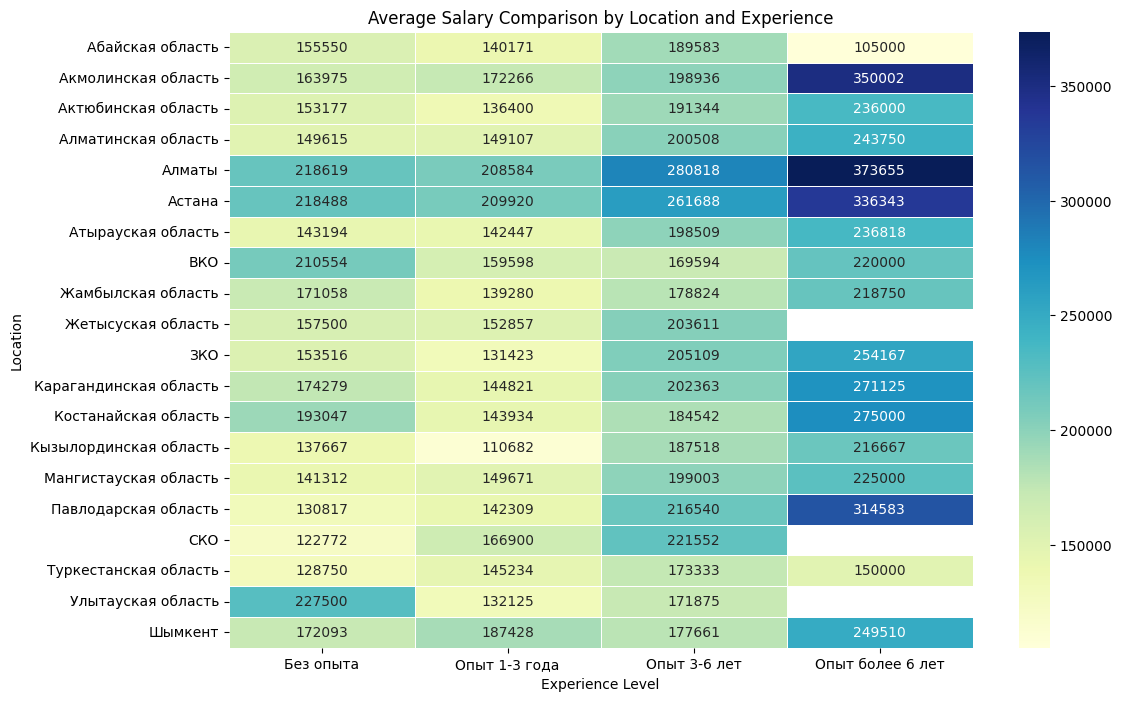

In [ ]:
# Creating a pivot table to calculate the average salary by location and experience level
salary_by_location_exp = df.pivot_table(values='Salary', index='Location', columns='Experience', aggfunc='mean')

# Generating a heatmap to visualize the average salary comparison by location and experience level
plt.figure(figsize=(12, 8))
sns.heatmap(salary_by_location_exp, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)

# Adding title and labels
plt.title('Average Salary Comparison by Location and Experience')
plt.xlabel('Experience Level')
plt.ylabel('Location')
plt.show()

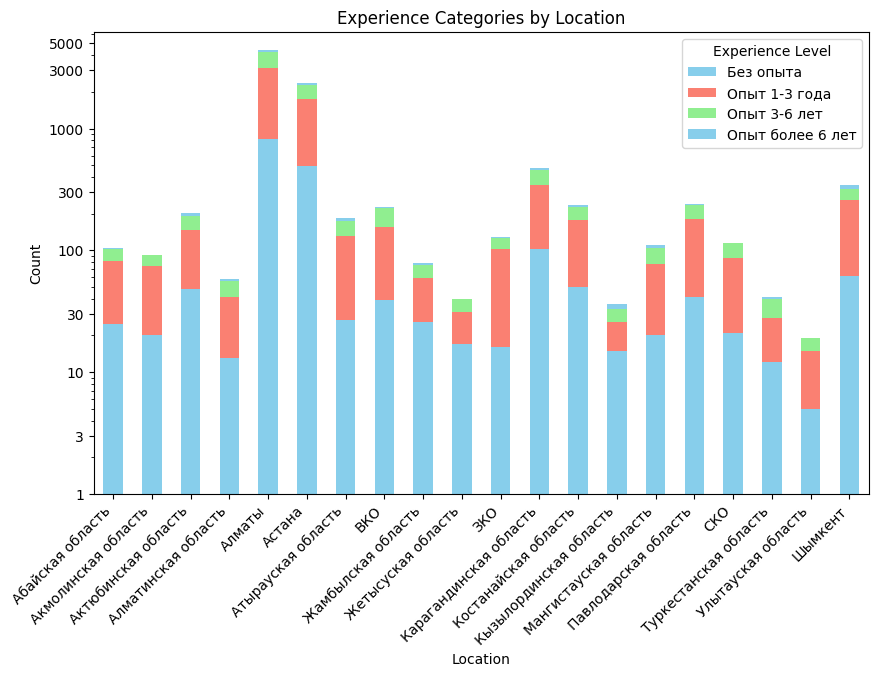

In [ ]:
experience_counts = pd.crosstab(df['Location'], df['Experience'])

# Plot stacked bar chart
ax = experience_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Experience Categories by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Experience Level')
plt.yscale('log')  #
plt.xticks(rotation=45, ha='right')  # Diagonal rotation and alignment to the right

plt.yticks([1, 3, 10, 30, 100, 300, 1000, 3000, 5000], [1, 3, 10, 30, 100, 300, 1000, 3000, 5000])
plt.show()


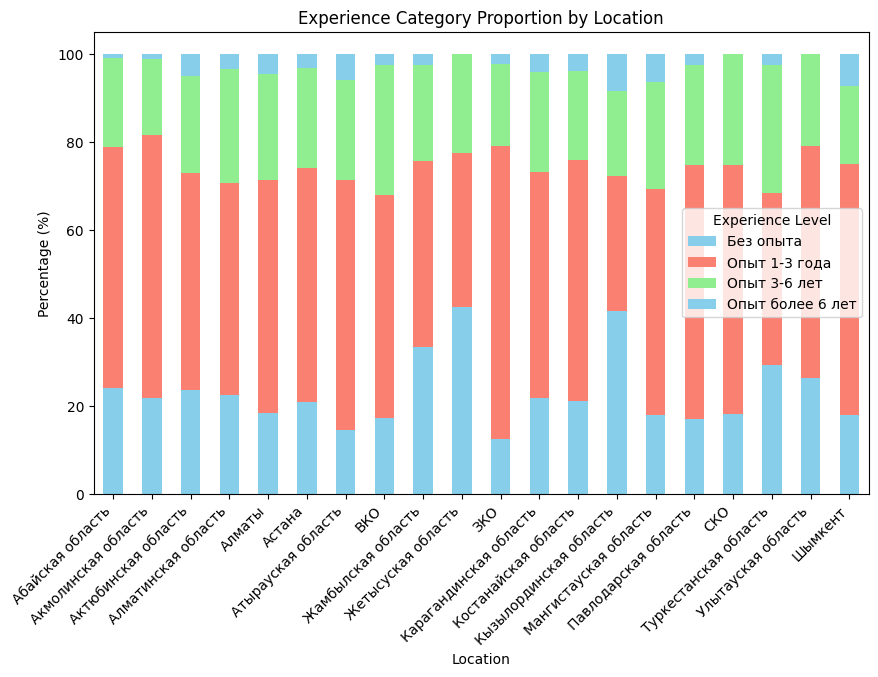

In [ ]:
experience_percentages = pd.crosstab(df['Location'], df['Experience'], normalize='index') * 100

# Plot the percentage stacked bar chart
experience_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Experience Category Proportion by Location')
plt.xlabel('Location')
plt.ylabel('Percentage (%)')
plt.legend(title='Experience Level')
plt.xticks(rotation=45, ha='right')  # Diagonal rotation and alignment to the right

plt.show()

In [ ]:
experience_counts = df['Experience'].value_counts()
experience_counts / 386

,count
Experience,
Опыт 1-3 года,13
Опыт 3-6 лет,6
Без опыта,5
Опыт более 6 лет,1


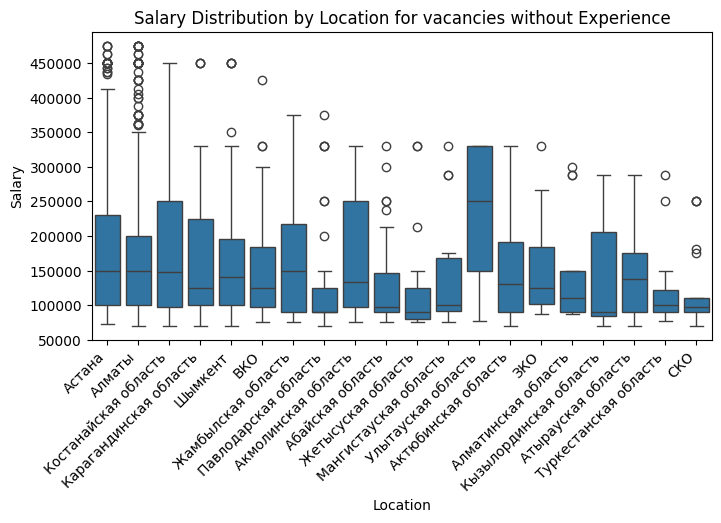

In [ ]:
# Set up the figure size
plt.figure(figsize=(8, 4))
df.drop(df[df['ID'] == 1565].index, inplace=True)
df1 = df[df['Experience'] == "Без опыта"]


Q1 = df1['Salary'].quantile(0.25)
Q3 = df1['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df1 = df1[(df1['Salary'] >= lower_bound) & (df1['Salary'] <= upper_bound)]




# Create the box plot
sns.boxplot(x=df1['Location'], y=df1['Salary'], data=df1)

# Add title and labels
plt.title('Salary Distribution by Location for vacancies without Experience')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')  # Diagonal rotation and alignment to the right


# Display the plot
plt.show()


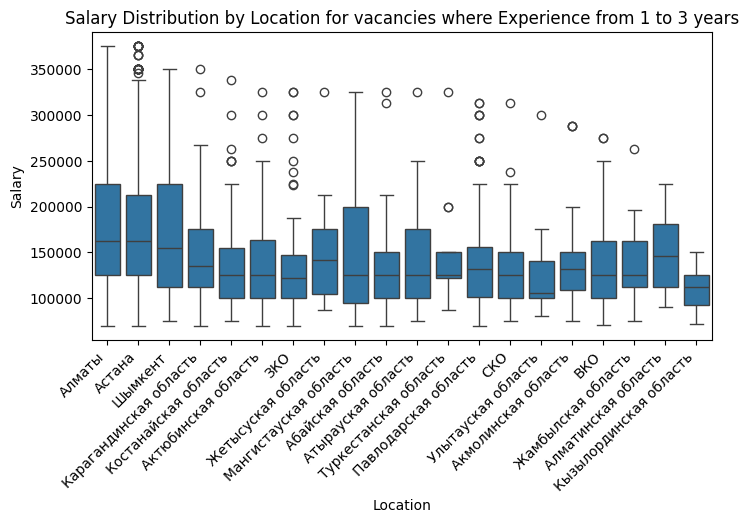

In [ ]:
# Set up the figure size
plt.figure(figsize=(8, 4))
df.drop(df[df['ID'] == 1565].index, inplace=True)
df2 = df[df['Experience'] == "Опыт 1-3 года"]


Q1 = df2['Salary'].quantile(0.25)
Q3 = df2['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df2 = df2[(df2['Salary'] >= lower_bound) & (df2['Salary'] <= upper_bound)]




# Create the box plot
sns.boxplot(x=df2['Location'], y=df2['Salary'], data=df2)

# Add title and labels
plt.title('Salary Distribution by Location for vacancies where Experience from 1 to 3 years')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')  # Diagonal rotation and alignment to the right


# Display the plot
plt.show()


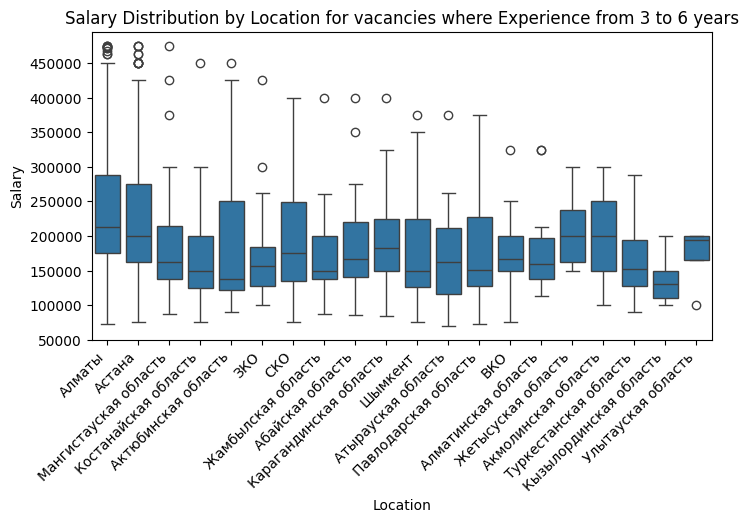

In [ ]:
# Set up the figure size
plt.figure(figsize=(8, 4))
df.drop(df[df['ID'] == 1565].index, inplace=True)
df3 = df[df['Experience'] == "Опыт 3-6 лет"]


Q1 = df3['Salary'].quantile(0.25)
Q3 = df3['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df3 = df3[(df3['Salary'] >= lower_bound) & (df3['Salary'] <= upper_bound)]




# Create the box plot
sns.boxplot(x=df3['Location'], y=df3['Salary'], data=df3)

# Add title and labels
plt.title('Salary Distribution by Location for vacancies where Experience from 3 to 6 years')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')  # Diagonal rotation and alignment to the right


# Display the plot
plt.show()


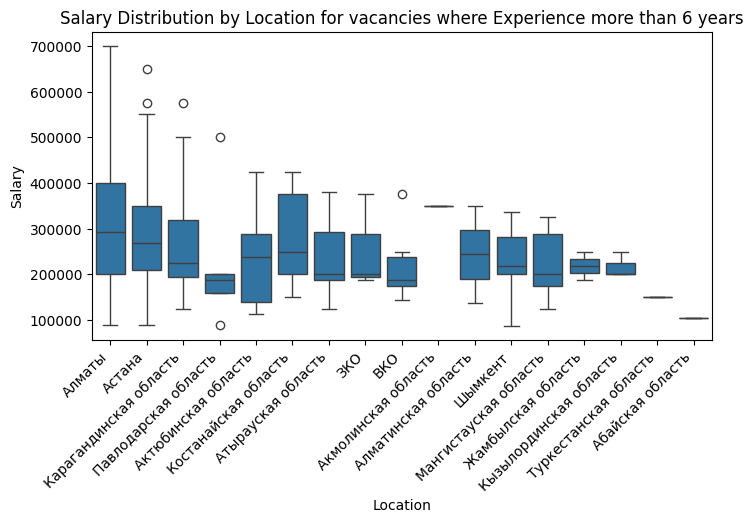

In [ ]:
# Set up the figure size
plt.figure(figsize=(8, 4))
df.drop(df[df['ID'] == 1565].index, inplace=True)
df4 = df[(df['Experience'] != "Без опыта") & (df['Experience'] != "Опыт 3-6 лет") & (df['Experience'] != "Опыт 1-3 года")]



Q1 = df4['Salary'].quantile(0.25)
Q3 = df4['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df4 = df4[(df4['Salary'] >= lower_bound) & (df4['Salary'] <= upper_bound)]

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.gca().yaxis.get_major_formatter().set_scientific(False)


# Create the box plot
sns.boxplot(x=df4['Location'], y=df4['Salary'], data=df4)

# Add title and labels
plt.title('Salary Distribution by Location for vacancies where Experience more than 6 years')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')  # Diagonal rotation and alignment to the right


# Display the plot
plt.show()


In [ ]:
df['Company_name'] = np.where(df['Company_name'].str.contains(r'\bИП\b', case=False, regex=True),
                              'ИП',
                              np.where(df['Company_name'].str.contains(r'\bТОО\b', case=False, regex=True),
                                       'ТОО',
                                       df['Company_name']))

print(df)

         ID                                       Vacancy_name  Salary  \
4401    402       Руководитель направления продаж ПК (B2B|B2C) 5500000   
10301   689                   Ведущий менеджер по продажам B2G 5500000   
4353    354      Руководитель направления продаж LED (B2B|B2C) 5500000   
10376   764           Ведущий менеджер по продажам LED B2B|B2C 5500000   
9807    195                           Менеджер по продажам B2G 4125000   
...     ...                                                ...     ...   
8261   1190  Инженер ПТО (монтаж технологического трубопров...   70000   
14002   390                                      Офис-менеджер   70000   
13185  1573                                 Техник-программист   70000   
13972   360                                      Офис-менеджер   70000   
11587  1975  Региональный менеджер по продажам (все регионы...   70000   

          Experience                                       Company_name  \
4401    Опыт 3-6 лет                

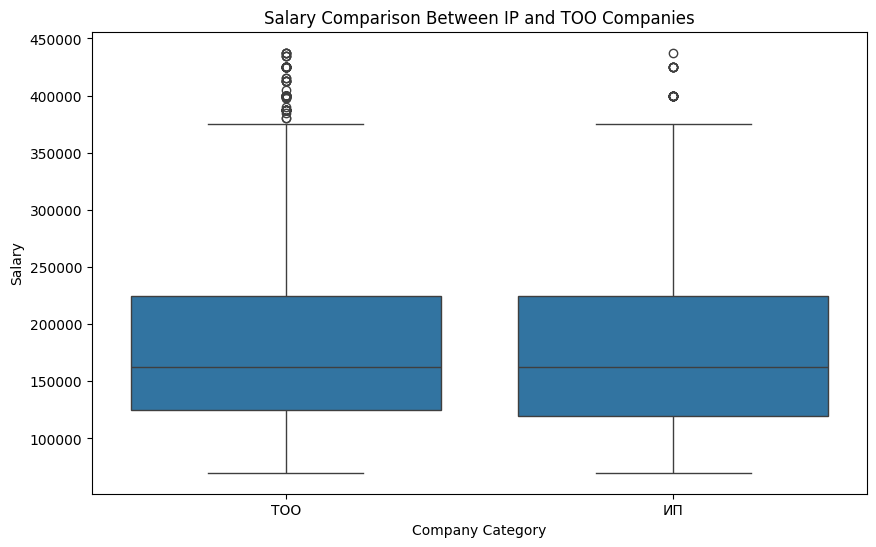

In [ ]:
df = df[df['Company_name'].isin(['ИП', 'ТОО'])]
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company_name', y='Salary', data=df)
plt.title('Salary Comparison Between IP and TOO Companies')
plt.xlabel('Company Category')
plt.ylabel('Salary')



plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_useOffset(False)
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()